# Imports and Loading Data

In [1]:
import pandas as pd

In [2]:
# from pandas_profiling import ProfileReport

In [3]:
DATA_PATH = './Data/'

In [4]:
OUTPUT_PATH = './Output/'

In [5]:
df = pd.read_csv(f"{DATA_PATH}Iddo_v7_5LA.csv")

/tmp/ipykernel_125/1592553496.py:1: DtypeWarning: Columns (105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{DATA_PATH}Iddo_v7_5LA.csv")


In [6]:
# df_sample = df.sample(frac=0.1) # Selecting a sample to avoid session crash

# EDA

In [7]:
# profile = ProfileReport(df_sample, title="Pandas Profiling Report",minimal=True)

In [8]:
# df_sample.profile_report()

In [9]:
# df_sample

In [10]:
# profile.to_file("trading_classification_report.html")

In [11]:
# df_sample.head()

# Correlation Analysis

Correlation cofficent is too low. On 0.5 on Target column, 0.3 only 4 columns and 0.08 getting the following. These are not helpful directly

In [12]:
# # Assume that your_dataframe is a pandas DataFrame
# correlations = df_sample.corrwith(df_sample['TOUCH']).abs()
# features =  correlations[correlations > 0.08].index.tolist()

In [13]:
# # getting a random sample
# df2= df[100000:].sample(frac=0.03)

In [14]:
# df2 = df2[features]

In [15]:
# df2 = df2.dropna()
# y_test = df2['TOUCH']
# df2 = df2.drop(['TOUCH'],axis=1)


In [16]:
# df1=df_sample[features]

In [17]:
for i in df.columns:
    print(i)

timestamp
open_x
high_x
low_x
close_x
volume
open_y
high_y
low_y
close_y
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
AA
AB
AC
AD
AE
AF
AG
AH
AI
AJ
AK
AL
AM
AN
AO
AP
AQ
AR
AS
AT
AU
AV
AW
AX
AY
AZ
BA
BB
BC
BD
BE
BF
BG
BI
BJ
BK
BL
BM
BN
BO
BP
BQ
BR
BS
BT
BU
BV
BW
BX
BY
BZ
CA
CB
CC
CD
CE
CF
CG
CH
CI
CJ
CK
CL
CM
CN
CO
CP
CQ
CR
CS
CT
CU
CV
CW
CX
CY
CZ
DA
DB
DC
DD
DE
DF
L_co
O_co
R_co
AE_co
AF_co
AH_co
AM_co
AN_co
AO_co
AQ_co
AT_co
AU_co
AV_co
AW_co
AX_co
AY_co
AZ_co
BA_co
BD_co
BI_co
BJ_co
BK_co
BQ_co
BR_co
BS_co
BT_co
BZ_co_upd
CC_co_upd
CI_co_upd
EXP3
EXP2
EXP2EXT
EXP2CAT05
EXP2CAT03
EXP2CAT1
EXP2CAT2
TOUCH


## Runing Random Forest On it. 

In [18]:
from sklearn.metrics import accuracy_score

# Splitting Train and Test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.ensemble import RandomForestClassifier 

In [21]:
# getting data type of all columns and deleting object column
# for column in df.columns:
#     print(column,df[column].dtype)

In [22]:
df = df.dropna()

In [23]:
df=df[df['EXP2CAT1']!=0.0]

In [24]:
target = df['EXP2CAT1']

In [25]:
X = df.drop(['timestamp','DD','DC','EXP3','EXP2','EXP2EXT','EXP2CAT05','EXP2CAT03','EXP2CAT1','EXP2CAT2'],axis=1)

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,target, test_size=0.15, random_state=42)

In [27]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((278693, 136), (49182, 136), (278693,), (49182,))

# Random Forest Classification

## Before Feature Selection

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,f1_score

In [30]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

In [32]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
y_pred = rfc.predict(X_test)

In [34]:
print(classification_report(y_pred,y_test)),print('Accuracy Score: ',accuracy_score(y_pred,y_test)),print('F1 Score: ',f1_score(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     23062
         2.0       1.00      1.00      1.00     26120

    accuracy                           1.00     49182
   macro avg       1.00      1.00      1.00     49182
weighted avg       1.00      1.00      1.00     49182

Accuracy Score:  0.9962384612256516
F1 Score:  0.9959895076849703


(None, None, None)

## Feature Importance

In [35]:
importances = rfc.feature_importances_

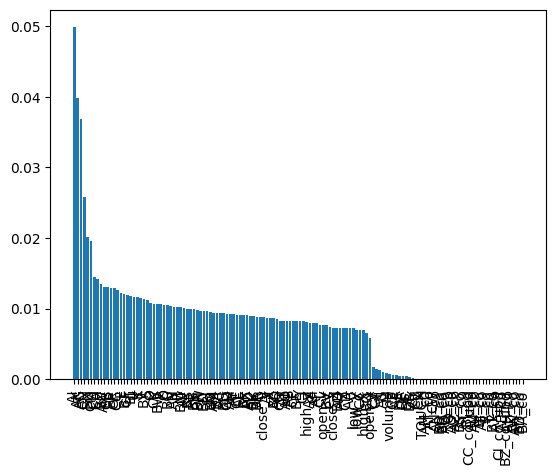

In [36]:
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(X.columns)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [37]:
labels

array(['AI', 'AK', 'AG', 'CN', 'BX', 'CM', 'CH', 'CA', 'BZ', 'AW', 'CB',
       'BP', 'CR', 'CG', 'L', 'BT', 'CF', 'BI', 'U', 'K', 'T', 'BY', 'S',
       'O', 'CK', 'BW', 'P', 'Q', 'BC', 'V', 'AN', 'R', 'BM', 'AV', 'BS',
       'AE', 'BB', 'BN', 'W', 'BD', 'BJ', 'BG', 'AM', 'BA', 'AC', 'BU',
       'CQ', 'AH', 'AY', 'CE', 'AL', 'BF', 'AX', 'AD', 'BK', 'BR', 'AB',
       'close_y', 'AJ', 'X', 'BL', 'AQ', 'CO', 'AT', 'AO', 'AP', 'CP',
       'BE', 'Y', 'CJ', 'high_y', 'AZ', 'CI', 'AF', 'CL', 'open_y', 'BV',
       'CS', 'close_x', 'BQ', 'AU', 'Z', 'CD', 'AA', 'low_y', 'low_x',
       'CC', 'high_x', 'BO', 'open_x', 'CV', 'CT', 'N', 'AS', 'M',
       'volume', 'CZ', 'AR', 'DA', 'DF', 'DE', 'DB', 'CY', 'CU', 'CX',
       'TOUCH', 'AM_co', 'AT_co', 'CW', 'AN_co', 'BQ_co', 'BR_co',
       'AQ_co', 'O_co', 'AO_co', 'AZ_co', 'BS_co', 'AY_co', 'BI_co',
       'CC_co_upd', 'AV_co', 'AU_co', 'BJ_co', 'AF_co', 'R_co', 'L_co',
       'BT_co', 'AX_co', 'CI_co_upd', 'AE_co', 'BZ_co_upd', 'AH_co',
   

In [38]:
labels_30_important=labels[:30]

In [39]:
labels_30_important

array(['AI', 'AK', 'AG', 'CN', 'BX', 'CM', 'CH', 'CA', 'BZ', 'AW', 'CB',
       'BP', 'CR', 'CG', 'L', 'BT', 'CF', 'BI', 'U', 'K', 'T', 'BY', 'S',
       'O', 'CK', 'BW', 'P', 'Q', 'BC', 'V'], dtype=object)

In [40]:
X_important = X[labels_30_important]

## After Feature Selection

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X_important,target, test_size=0.15, random_state=42)

In [42]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((278693, 30), (49182, 30), (278693,), (49182,))

In [43]:
rfm = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

In [44]:
rfm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = rfm.predict(X_test)

In [46]:
print(classification_report(y_pred,y_test)),print('Accuracy Score: ',accuracy_score(y_pred,y_test)),print('F1 Score: ',f1_score(y_pred,y_test))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     23078
         2.0       1.00      1.00      1.00     26104

    accuracy                           1.00     49182
   macro avg       1.00      1.00      1.00     49182
weighted avg       1.00      1.00      1.00     49182

Accuracy Score:  0.9955878166808995
F1 Score:  0.9952974320078016


(None, None, None)

## Saving Models

In [47]:
from joblib import dump,load

In [48]:
filename = 'random_forest_144_features.joblib'
dump(rfc, filename)

['random_forest_144_features.joblib']

In [49]:
filename = 'random_forest_30_features.joblib'
dump(rfm, filename)

['random_forest_30_features.joblib']

## Loading Models For Verification

In [50]:
loaded_model = load('random_forest_30_features.joblib')

In [51]:
y_pred_1 = loaded_model.predict(X_test)

In [52]:
print(classification_report(y_pred_1,y_test)),print('Accuracy Score: ',accuracy_score(y_pred_1,y_test)),print('F1 Score: ',f1_score(y_pred_1,y_test))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     23078
         2.0       1.00      1.00      1.00     26104

    accuracy                           1.00     49182
   macro avg       1.00      1.00      1.00     49182
weighted avg       1.00      1.00      1.00     49182

Accuracy Score:  0.9955878166808995
F1 Score:  0.9952974320078016


(None, None, None)

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

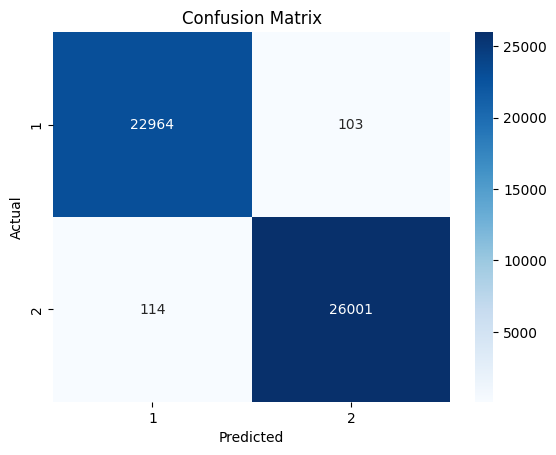

In [54]:
cnf_matrix = confusion_matrix(y_test, y_pred_1,)

# plot the confusion matrix
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g',xticklabels=[1,2], yticklabels=[1,2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Loaded Successfully. :)  

**Comments:** 

1. Models got good level of accuracy 
2. 30 features are selected 
3. Same level of accuracy attained on Test Set.